This notebook is used to draw accuracy and loss plot from log.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

NUM_ROUND_KEY = 'round_number'
ACCURACY_KEY = 'accuracy'
LOSS_KEY = 'loss'
CLIENT_ID_KEY = 'cid'
NUM_SAMPLES_KEY = 'num_samples'

In [59]:
dataset = 'ichar'
number = '110'
alg = 'default'
acc1 = []
acc2 = []
for test_id in range(10):
    validation_id = (test_id + 9) % 10
    train_id = list(range(10))
    train_id.remove(test_id)
    train_id.remove(validation_id)

    experiment_name = f'{number}_{dataset}_{test_id}_{alg}'
    log_path = f'./log/{experiment_name}/test.csv'
    
    data = pd.read_csv(log_path)
    train_data = data.loc[data['cid'].isin(train_id)]
    validation_data = data.loc[data['cid'] == validation_id]
    test_data = data.loc[data['cid'] == test_id]

    train_avg = train_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
    validation_avg = validation_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
    test_avg = test_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
    
    # Filter from round 300
    filter_out = False
    filter_round = 300
    if filter_out:
        train_avg = train_avg[train_avg['round_number'] >= filter_round]
        validation_avg = validation_avg[validation_avg['round_number'] >= filter_round]
        test_avg = test_avg[test_avg['round_number'] >= filter_round]
        
    print(test_id)
    test_in_lowest_val = test_avg[validation_avg['loss'] == validation_avg['loss'].min()]
    max_test = test_avg[test_avg['accuracy'] == test_avg['accuracy'].max()]
    acc1.append(test_in_lowest_val.iloc[0].accuracy)
    acc2.append(max_test.iloc[0].accuracy)
    print(test_in_lowest_val)
    print(max_test)
    print('------------------------')
print('test in lowest val')
print(np.mean(acc1))
print(np.std(acc1))
print('max test')
print(np.mean(acc2))
print(np.std(acc2))

0
    round_number  cid  num_samples     loss  accuracy
28           116  0.0        790.0  1.82219  0.364557
    round_number  cid  num_samples      loss  accuracy
61           248  0.0        790.0  1.649535  0.494937
66           268  0.0        790.0  1.665744  0.494937
71           288  0.0        790.0  1.643416  0.494937
------------------------
1
    round_number  cid  num_samples      loss  accuracy
40           164  1.0       1559.0  2.261275  0.242463
     round_number  cid  num_samples      loss  accuracy
120           484  1.0       1559.0  2.357755  0.337396
------------------------
2
     round_number  cid  num_samples      loss  accuracy
100           404  2.0       3219.0  2.196197  0.459459
     round_number  cid  num_samples      loss  accuracy
101           408  2.0       3219.0  2.173251  0.467226
------------------------
3
    round_number  cid  num_samples      loss  accuracy
27           112  3.0       3178.0  1.669257  0.413468
    round_number  cid  num_sample

In [80]:
pd.options.display.max_rows = 4000
dataset = 'ichar'
number = '112'
alg = 'average2'

test_id = 8
train_id = [0, 1, 2, 3, 4, 5, 6, 7]
experiment_name = f'{number}_{dataset}_{test_id}_{alg}'
log_path = f'./log/{experiment_name}/test.csv'

data = pd.read_csv(log_path)
train_data = data.loc[data['cid'].isin(train_id)]
test_data = data.loc[data['cid'] == test_id]
train_avg = train_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
test_avg = test_data.groupby(NUM_ROUND_KEY, as_index=False).mean()

print(train_avg)

    round_number  cid  num_samples      loss  accuracy
0              8  3.5     2434.125  1.503544  0.627434
1             16  3.5     2434.125  1.777932  0.578158
2             24  3.5     2434.125  1.572553  0.641721
3             32  3.5     2434.125  1.626457  0.644035
4             40  3.5     2434.125  1.490030  0.654131
5             48  3.5     2434.125  1.443023  0.655646
6             56  3.5     2434.125  1.158768  0.704490
7             64  3.5     2434.125  1.321714  0.643852
8             72  3.5     2434.125  1.339930  0.650821
9             80  3.5     2434.125  1.254774  0.666267
10            88  3.5     2434.125  0.928791  0.708560
11            96  3.5     2434.125  1.410647  0.621983
12           104  3.5     2434.125  1.250541  0.680508
13           112  3.5     2434.125  1.238844  0.715865
14           120  3.5     2434.125  1.140865  0.725222
15           128  3.5     2434.125  1.253190  0.704395
16           136  3.5     2434.125  1.419370  0.649086
17        

In [1]:
'''
Some code snippets are borrowed from LEAF.

LEAF: A Benchmark for Federated Settings
Sebastian Caldas, Sai Meher Karthik Duddu, Peter Wu, Tian Li,
Jakub Konečný, H. Brendan McMahan, Virginia Smith, and Ameet Talwalkar.
Workshop on Federated Learning for Data Privacy and Confidentiality (2019).

https://leaf.cmu.edu/
'''

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils.plotter import Plotter

In [2]:
accuracy_by_round_number = True # If false, plot accuracy distribution from round.
sort_accuracy_distribution = False
SHOW_WEIGHTED = False # show weighted accuracy instead of unweighted accuracy

round_number    380.000000
cid             299.500000
num_samples     204.340000
loss              2.334473
accuracy          0.545652
Name: 18, dtype: float64


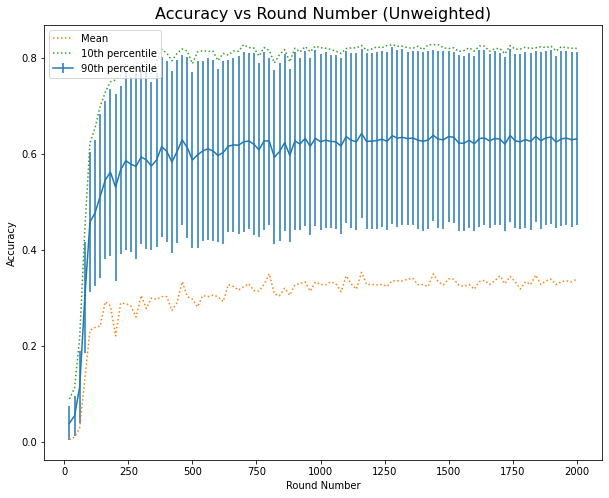

    round_number    cid  num_samples      loss  accuracy
0             20  199.5      269.135  3.785815  0.038551
1             40  199.5      269.135  3.786240  0.053753
2             60  199.5      269.135  3.549301  0.114090
3             80  199.5      269.135  2.788883  0.300044
4            100  199.5      269.135  2.204883  0.457470
5            120  199.5      269.135  2.142042  0.476910
6            140  199.5      269.135  1.998864  0.511240
7            160  199.5      269.135  1.861445  0.545399
8            180  199.5      269.135  1.858587  0.561632
9            200  199.5      269.135  2.104083  0.530496
10           220  199.5      269.135  1.853866  0.566520
11           240  199.5      269.135  1.839821  0.585805
12           260  199.5      269.135  1.886777  0.577988
13           280  199.5      269.135  1.963460  0.573913
14           300  199.5      269.135  1.852179  0.593201
15           320  199.5      269.135  1.934971  0.587300
16           340  199.5      26

In [5]:
experiment_name = '1_10train_62samples_default'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=400).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

round_number    760.000000
cid             299.500000
num_samples     142.340000
loss              2.043400
accuracy          0.660018
Name: 37, dtype: float64


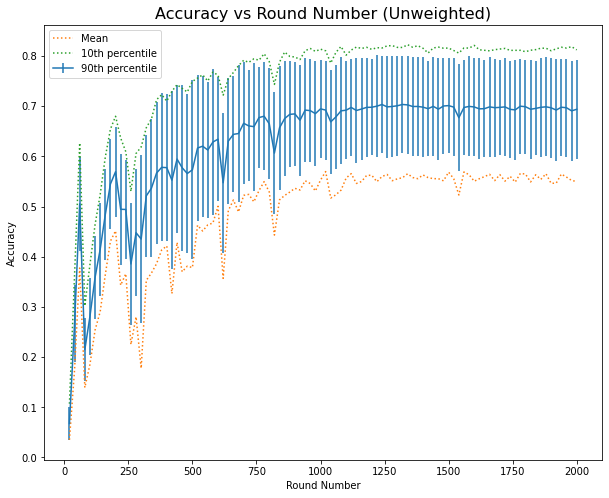

    round_number    cid  num_samples      loss  accuracy
0             20  199.5      207.135  3.682219  0.067804
1             40  199.5      207.135  3.130920  0.266527
2             60  199.5      207.135  2.114888  0.505379
3             80  199.5      207.135  3.305921  0.214622
4            100  199.5      207.135  2.962975  0.280950
5            120  199.5      207.135  2.843729  0.358595
6            140  199.5      207.135  2.484779  0.414742
7            160  199.5      207.135  2.357092  0.484225
8            180  199.5      207.135  2.077079  0.544917
9            200  199.5      207.135  1.992724  0.569386
10           220  199.5      207.135  2.513551  0.494558
11           240  199.5      207.135  2.539921  0.494177
12           260  199.5      207.135  3.102293  0.385617
13           280  199.5      207.135  2.917235  0.447807
14           300  199.5      207.135  2.949916  0.435348
15           320  199.5      207.135  2.643894  0.521275
16           340  199.5      20

In [8]:
experiment_name = '1_10train_62samples_meta'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=400).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

round_number    1020.000000
cid              299.500000
num_samples      142.340000
loss               2.370003
accuracy           0.475225
Name: 84, dtype: float64


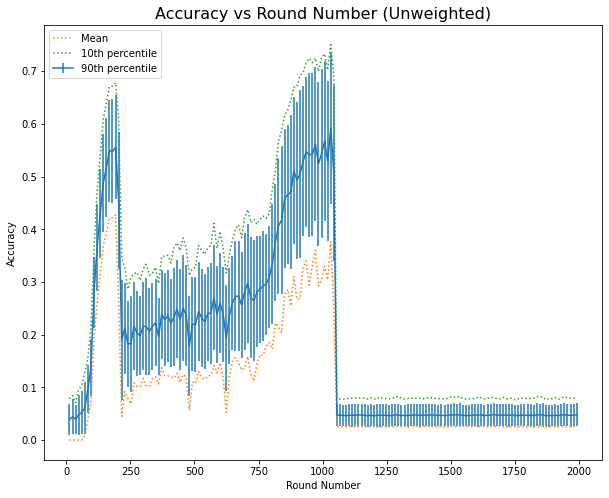

     round_number    cid  num_samples       loss  accuracy
0              12  199.5      207.135   3.836942  0.038737
1              24  199.5      207.135   3.802684  0.044181
2              36  199.5      207.135   3.848216  0.039696
3              48  199.5      207.135   3.794559  0.047774
4              60  199.5      207.135   3.777247  0.052471
5              72  199.5      207.135   3.719324  0.060872
6              84  199.5      207.135   3.602225  0.096582
7              96  199.5      207.135   3.418347  0.138101
8             108  199.5      207.135   2.960014  0.280694
9             120  199.5      207.135   2.596648  0.366181
10            132  199.5      207.135   2.320571  0.429425
11            144  199.5      207.135   2.154553  0.487565
12            156  199.5      207.135   2.011175  0.516620
13            168  199.5      207.135   1.877187  0.548953
14            180  199.5      207.135   1.846618  0.548025
15            192  199.5      207.135   1.846185  0.5553

In [9]:
experiment_name = '1_10train_62samples_sequential'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=400).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

round_number    528.000000
cid             299.500000
num_samples     142.340000
loss              1.885205
accuracy          0.565106
Name: 43, dtype: float64


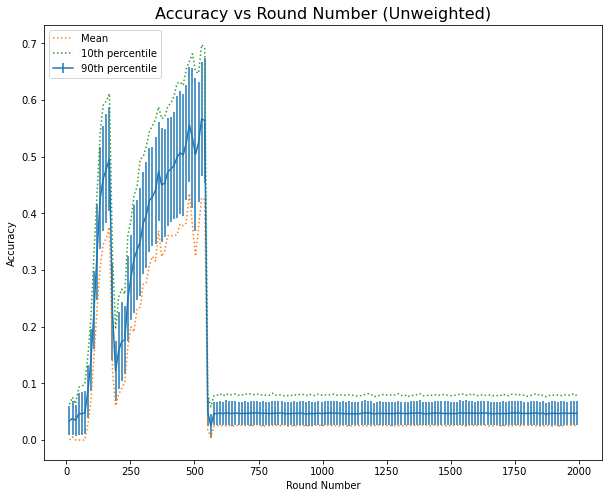

     round_number    cid  num_samples          loss  accuracy
0              12  199.5      207.135  3.860669e+00  0.033977
1              24  199.5      207.135  3.806579e+00  0.038226
2              36  199.5      207.135  3.819345e+00  0.034787
3              48  199.5      207.135  3.815190e+00  0.046050
4              60  199.5      207.135  3.751716e+00  0.046603
5              72  199.5      207.135  3.752495e+00  0.047846
6              84  199.5      207.135  3.656355e+00  0.086065
7              96  199.5      207.135  3.482516e+00  0.141499
8             108  199.5      207.135  3.193839e+00  0.229362
9             120  199.5      207.135  2.822498e+00  0.331656
10            132  199.5      207.135  2.467818e+00  0.426931
11            144  199.5      207.135  2.332585e+00  0.461399
12            156  199.5      207.135  2.203796e+00  0.478749
13            168  199.5      207.135  2.182726e+00  0.495548
14            180  199.5      207.135  3.575690e+00  0.225463
15      

In [10]:
experiment_name = '1_10train_62samples_average'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=400).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

round_number    528.000000
cid             299.500000
num_samples     142.340000
loss              1.103314
accuracy          0.718829
Name: 43, dtype: float64


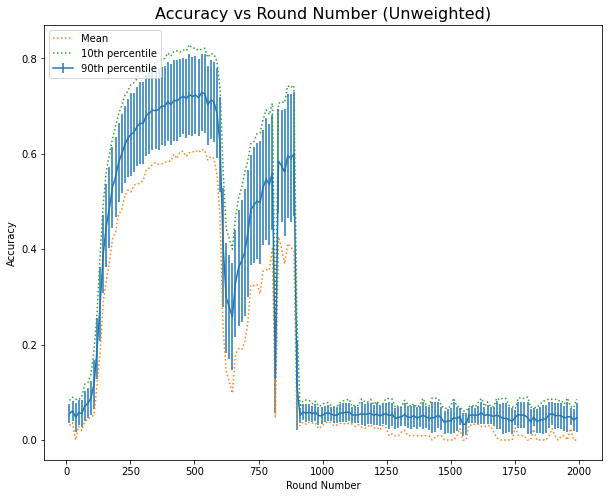

     round_number    cid  num_samples        loss  accuracy
0              12  199.5      207.135    3.764929  0.055683
1              24  199.5      207.135    3.727870  0.060888
2              36  199.5      207.135    3.737627  0.048010
3              48  199.5      207.135    3.725750  0.057042
4              60  199.5      207.135    3.722585  0.055533
5              72  199.5      207.135    3.688705  0.071187
6              84  199.5      207.135    3.663578  0.077079
7              96  199.5      207.135    3.606434  0.087934
8             108  199.5      207.135    3.508987  0.116779
9             120  199.5      207.135    3.277942  0.191863
10            132  199.5      207.135    2.978353  0.285923
11            144  199.5      207.135    2.604915  0.390051
12            156  199.5      207.135    2.362556  0.449259
13            168  199.5      207.135    2.177098  0.486799
14            180  199.5      207.135    1.971651  0.529879
15            192  199.5      207.135   

In [11]:
experiment_name = '1_10train_62samples_average2'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=400).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

round_number    456.000000
cid             299.500000
num_samples     142.340000
loss              1.156932
accuracy          0.714793
Name: 56, dtype: float64


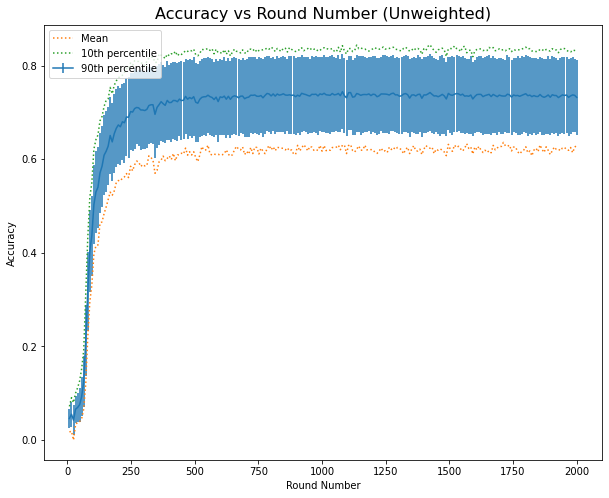

     round_number    cid  num_samples      loss  accuracy
0               8  199.5      207.135  3.766884  0.046108
1              16  199.5      207.135  3.737507  0.055123
2              24  199.5      207.135  3.774744  0.042553
3              32  199.5      207.135  3.702694  0.065928
4              40  199.5      207.135  3.704591  0.069535
5              48  199.5      207.135  3.653135  0.075505
6              56  199.5      207.135  3.594669  0.092941
7              64  199.5      207.135  3.495230  0.124666
8              72  199.5      207.135  3.257182  0.211913
9              80  199.5      207.135  2.911354  0.317646
10             88  199.5      207.135  2.545122  0.403327
11             96  199.5      207.135  2.421549  0.436530
12            104  199.5      207.135  2.178608  0.502812
13            112  199.5      207.135  2.013772  0.529944
14            120  199.5      207.135  1.929053  0.540059
15            128  199.5      207.135  1.828391  0.570710
16            

In [12]:
experiment_name = '1_10train_62samples_whole'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=400).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

In [3]:
prefix = "101"

round_number    520.000000
cid             299.500000
num_samples     204.340000
loss              2.239480
accuracy          0.528005
Name: 25, dtype: float64


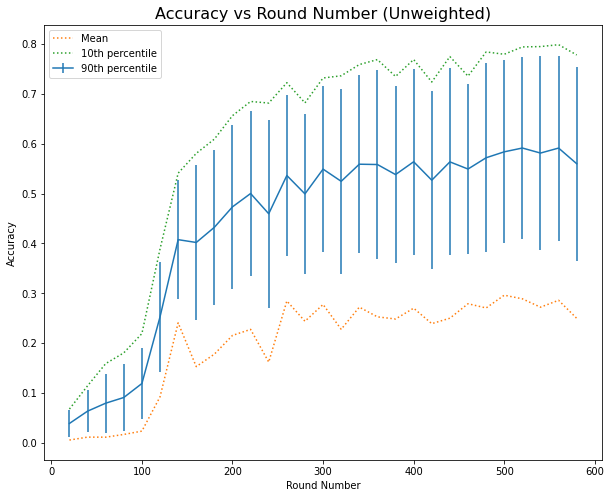

    round_number    cid  num_samples      loss  accuracy
0             20  199.5      269.135  3.800419  0.038924
1             40  199.5      269.135  3.819822  0.063541
2             60  199.5      269.135  3.797515  0.079507
3             80  199.5      269.135  3.606735  0.090965
4            100  199.5      269.135  3.289175  0.119004
5            120  199.5      269.135  2.913960  0.252658
6            140  199.5      269.135  2.386491  0.407495
7            160  199.5      269.135  2.398939  0.401832
8            180  199.5      269.135  2.269776  0.432283
9            200  199.5      269.135  2.149172  0.473299
10           220  199.5      269.135  2.084142  0.500035
11           240  199.5      269.135  2.400657  0.459443
12           260  199.5      269.135  1.913449  0.536161
13           280  199.5      269.135  2.175626  0.499280
14           300  199.5      269.135  1.922487  0.548946
15           320  199.5      269.135  2.127025  0.524495
16           340  199.5      26

In [15]:
experiment_name = f'{prefix}_femnist_default'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=400).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

In [106]:
experiment_name = f'{prefix}_femnist_meta'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=400).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

FileNotFoundError: [Errno 2] No such file or directory: './log/90_femnist_meta/test.csv'

round_number    960.000000
cid             299.500000
num_samples     142.340000
loss              1.090628
accuracy          0.735047
Name: 39, dtype: float64


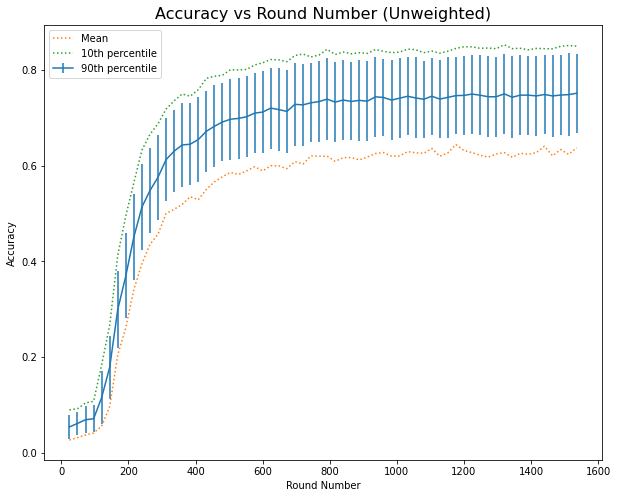

    round_number    cid  num_samples      loss  accuracy
0             24  199.5      207.135  3.713483  0.054109
1             48  199.5      207.135  3.689419  0.061400
2             72  199.5      207.135  3.692046  0.069101
3             96  199.5      207.135  3.661308  0.071163
4            120  199.5      207.135  3.613121  0.115446
5            144  199.5      207.135  3.457252  0.178826
6            168  199.5      207.135  3.109737  0.299349
7            192  199.5      207.135  2.699819  0.369737
8            216  199.5      207.135  2.321400  0.451026
9            240  199.5      207.135  2.029684  0.513563
10           264  199.5      207.135  1.840638  0.548028
11           288  199.5      207.135  1.733741  0.575864
12           312  199.5      207.135  1.575218  0.612771
13           336  199.5      207.135  1.483595  0.630432
14           360  199.5      207.135  1.409383  0.643343
15           384  199.5      207.135  1.383987  0.644966
16           408  199.5      20

In [201]:
experiment_name = f'{prefix}_10train_62samples_average2'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=400).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

In [73]:
experiment_name = f'{prefix}_10train_62samples_whole'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=400).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

FileNotFoundError: [Errno 2] No such file or directory: './log/47_reg_001_10train_62samples_whole/test.csv'

round_number    1152.000000
cid              299.500000
num_samples      142.340000
loss               1.768854
accuracy           0.602221
Name: 47, dtype: float64


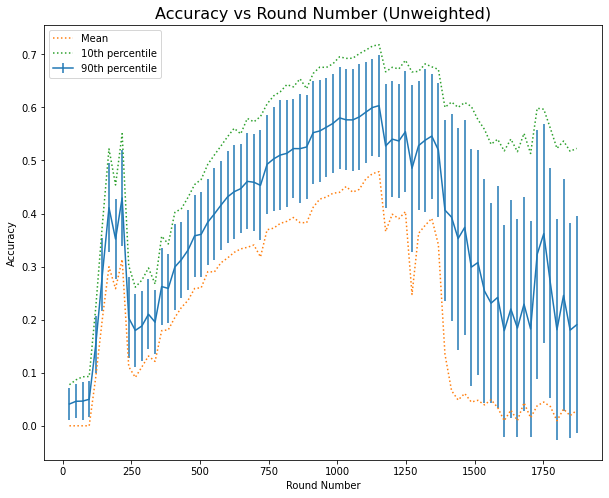

    round_number    cid  num_samples      loss  accuracy
0             24  199.5      207.135  3.824520  0.041066
1             48  199.5      207.135  3.767186  0.046182
2             72  199.5      207.135  3.735390  0.046532
3             96  199.5      207.135  3.660414  0.049952
4            120  199.5      207.135  3.455449  0.153413
5            144  199.5      207.135  2.970614  0.285146
6            168  199.5      207.135  2.492823  0.410962
7            192  199.5      207.135  2.896875  0.351931
8            216  199.5      207.135  2.471913  0.429427
9            240  199.5      207.135  3.405619  0.203222
10           264  199.5      207.135  3.452909  0.179749
11           288  199.5      207.135  3.360749  0.188142
12           312  199.5      207.135  3.220375  0.210158
13           336  199.5      207.135  3.189215  0.195275
14           360  199.5      207.135  3.094850  0.262383
15           384  199.5      207.135  3.011418  0.258865
16           408  199.5      20

In [54]:
experiment_name = f'{prefix}_10train_62samples_sequential'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=400).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

round_number    1872.000000
cid              299.500000
num_samples      142.340000
loss               1.875687
accuracy           0.546687
Name: 77, dtype: float64


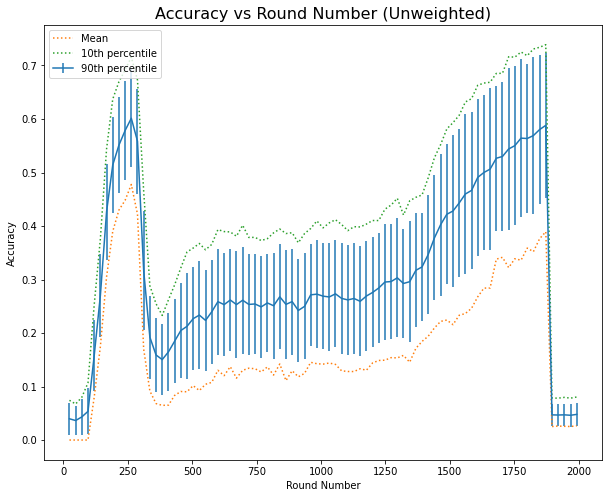

    round_number    cid  num_samples      loss  accuracy
0             24  199.5      207.135  3.821937  0.039734
1             48  199.5      207.135  3.786265  0.036443
2             72  199.5      207.135  3.757629  0.043196
3             96  199.5      207.135  3.754933  0.053630
4            120  199.5      207.135  3.516107  0.157473
5            144  199.5      207.135  3.070043  0.270120
6            168  199.5      207.135  2.467857  0.426414
7            192  199.5      207.135  2.089249  0.514067
8            216  199.5      207.135  1.876730  0.551203
9            240  199.5      207.135  1.739712  0.578444
10           264  199.5      207.135  1.651082  0.601408
11           288  199.5      207.135  1.865623  0.558466
12           312  199.5      207.135  3.258145  0.316837
13           336  199.5      207.135  3.611088  0.192373
14           360  199.5      207.135  3.567197  0.158939
15           384  199.5      207.135  3.470107  0.150325
16           408  199.5      20

In [55]:
experiment_name = f'{prefix}_10train_62samples_average'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=400).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

round_number    1000.000000
cid              224.500000
num_samples      162.473333
loss               1.246961
accuracy           0.686786
Name: 49, dtype: float64


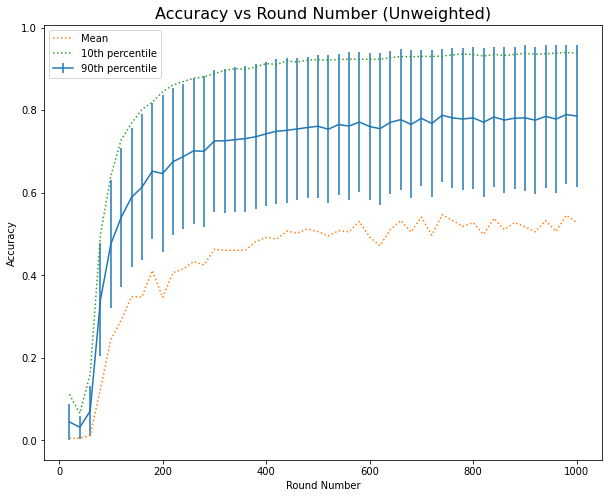

    round_number    cid  num_samples      loss  accuracy
0             20  149.5   241.203333  3.764468  0.044905
1             40  149.5   241.203333  3.719519  0.031806
2             60  149.5   241.203333  3.635296  0.071069
3             80  149.5   241.203333  2.916864  0.341154
4            100  149.5   241.203333  2.137148  0.475820
5            120  149.5   241.203333  1.789918  0.540622
6            140  149.5   241.203333  1.558906  0.588882
7            160  149.5   241.203333  1.465296  0.613325
8            180  149.5   241.203333  1.277764  0.652252
9            200  149.5   241.203333  1.318270  0.646462
10           220  149.5   241.203333  1.182683  0.675252
11           240  149.5   241.203333  1.129731  0.687576
12           260  149.5   241.203333  1.081206  0.701574
13           280  149.5   241.203333  1.091993  0.700447
14           300  149.5   241.203333  0.989437  0.725520
15           320  149.5   241.203333  0.991836  0.725853
16           340  149.5   241.2

In [72]:
experiment_name = 'tester4_whole_vanilla'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=300).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

round_number    960.000000
cid             224.500000
num_samples     162.473333
loss              0.627076
accuracy          0.814824
Name: 47, dtype: float64


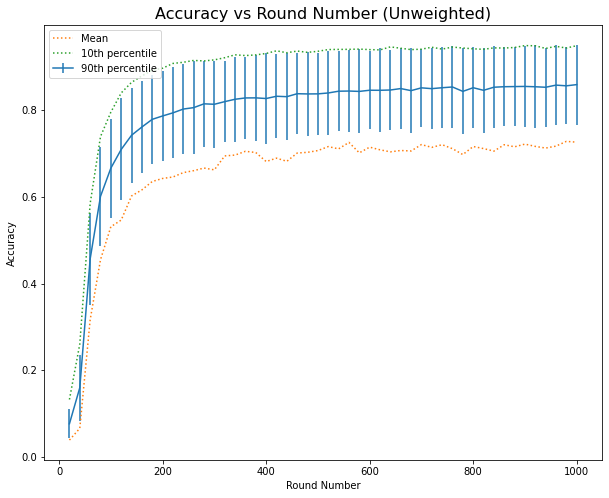

    round_number    cid  num_samples      loss  accuracy
0             20  149.5   241.203333  3.693364  0.076456
1             40  149.5   241.203333  3.302379  0.159608
2             60  149.5   241.203333  2.094534  0.456709
3             80  149.5   241.203333  1.498994  0.601171
4            100  149.5   241.203333  1.221152  0.666267
5            120  149.5   241.203333  1.037013  0.709407
6            140  149.5   241.203333  0.907526  0.742165
7            160  149.5   241.203333  0.833303  0.761199
8            180  149.5   241.203333  0.761961  0.778898
9            200  149.5   241.203333  0.730440  0.786689
10           220  149.5   241.203333  0.708502  0.793871
11           240  149.5   241.203333  0.667782  0.802611
12           260  149.5   241.203333  0.663967  0.805869
13           280  149.5   241.203333  0.629312  0.814668
14           300  149.5   241.203333  0.627807  0.813645
15           320  149.5   241.203333  0.602915  0.819716
16           340  149.5   241.2

In [137]:
experiment_name = 'tester4_whole_meta'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=300).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), color='brown', ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

In [ ]:
experiment_name = 'tester6_whole_special'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=300).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), color='brown', ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

In [ ]:
experiment_name = 'tester7_whole_special'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=300).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), color='brown', ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

round_number    1980.000000
cid              224.500000
num_samples      162.473333
loss               0.642156
accuracy           0.806529
Name: 164, dtype: float64


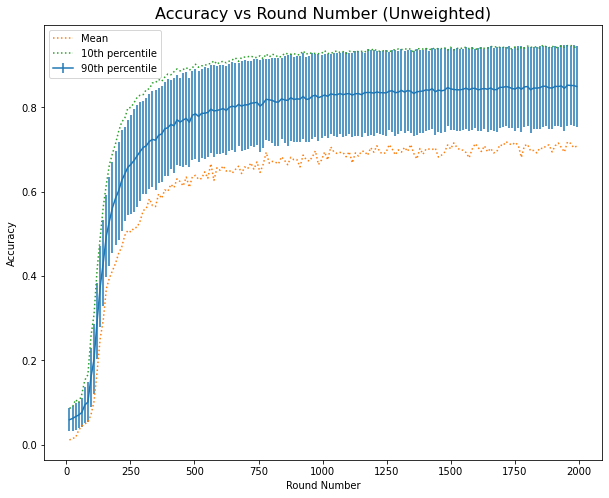

     round_number    cid  num_samples      loss  accuracy
0              12  149.5   241.203333  3.760840  0.058986
1              24  149.5   241.203333  3.740281  0.061868
2              36  149.5   241.203333  3.724242  0.066292
3              48  149.5   241.203333  3.711733  0.070098
4              60  149.5   241.203333  3.698352  0.075873
5              72  149.5   241.203333  3.669385  0.093949
6              84  149.5   241.203333  3.588401  0.100720
7              96  149.5   241.203333  3.444545  0.159238
8             108  149.5   241.203333  3.186813  0.202576
9             120  149.5   241.203333  2.809829  0.292927
10            132  149.5   241.203333  2.484510  0.374041
11            144  149.5   241.203333  2.242232  0.431822
12            156  149.5   241.203333  2.014824  0.495161
13            168  149.5   241.203333  1.854405  0.530388
14            180  149.5   241.203333  1.716114  0.562345
15            192  149.5   241.203333  1.596448  0.584610
16            

In [88]:
experiment_name = 'tester8_whole_special'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=300).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), color='brown', ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

round_number    1476.000000
cid              224.500000
num_samples      162.473333
loss               0.665641
accuracy           0.801529
Name: 122, dtype: float64


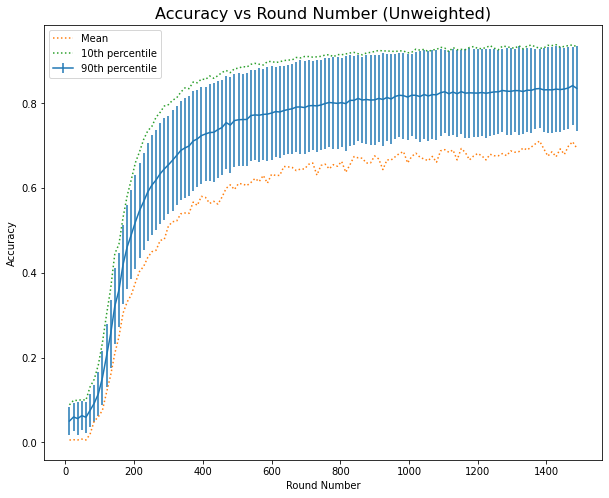

     round_number    cid  num_samples      loss  accuracy
0              12  149.5   241.203333  3.853529  0.050580
1              24  149.5   241.203333  3.811469  0.060187
2              36  149.5   241.203333  3.810321  0.056374
3              48  149.5   241.203333  3.776268  0.063321
4              60  149.5   241.203333  3.778016  0.059537
5              72  149.5   241.203333  3.730052  0.075639
6              84  149.5   241.203333  3.703010  0.092456
7              96  149.5   241.203333  3.640192  0.114499
8             108  149.5   241.203333  3.451031  0.152818
9             120  149.5   241.203333  3.159063  0.204391
10            132  149.5   241.203333  2.870293  0.256287
11            144  149.5   241.203333  2.602062  0.321481
12            156  149.5   241.203333  2.416643  0.359306
13            168  149.5   241.203333  2.220284  0.419723
14            180  149.5   241.203333  2.062330  0.461312
15            192  149.5   241.203333  1.939836  0.490098
16            

In [89]:
experiment_name = 'tester9_whole_special2'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=300).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), color='brown', ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

In [ ]:
experiment_name = 'tester10_whole_special'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=300).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), color='brown', ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

round_number    1936.000000
cid              224.500000
num_samples      162.473333
loss               0.636858
accuracy           0.806933
Name: 120, dtype: float64


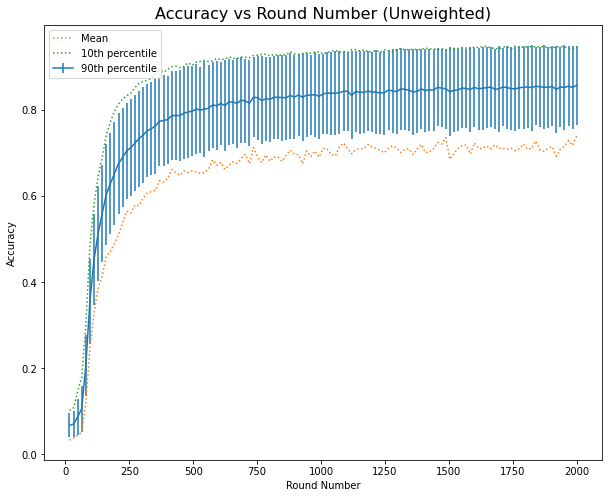

     round_number    cid  num_samples      loss  accuracy
0              16  149.5   241.203333  3.755305  0.067509
1              32  149.5   241.203333  3.718376  0.070439
2              48  149.5   241.203333  3.690013  0.086620
3              64  149.5   241.203333  3.550547  0.106296
4              80  149.5   241.203333  3.104560  0.206047
5              96  149.5   241.203333  2.534137  0.354941
6             112  149.5   241.203333  2.142704  0.452329
7             128  149.5   241.203333  1.874916  0.513240
8             144  149.5   241.203333  1.661184  0.559621
9             160  149.5   241.203333  1.492878  0.603926
10            176  149.5   241.203333  1.385112  0.628887
11            192  149.5   241.203333  1.274412  0.652849
12            208  149.5   241.203333  1.186072  0.675909
13            224  149.5   241.203333  1.118498  0.690011
14            240  149.5   241.203333  1.048526  0.705515
15            256  149.5   241.203333  1.015548  0.712800
16            

In [90]:
experiment_name = 'tester11_whole_special3'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
final_accuracy = test_log_plotter.final_accuracy(num_total_clients=300).iloc[0]
print(final_accuracy)
if accuracy_by_round_number:
    test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=1, plot_stds=True)
else:
    test_log_plotter.plot_accuracy_distribution_from_round(round_number=final_accuracy['round_number'], figsize=(60, 48), color='brown', ylim=(0.0, 1.0), sort=sort_accuracy_distribution)

In [ ]:
SHOW_WEIGHTED = False # show weighted accuracy instead of unweighted accuracy
experiment_name = 'test_whole_0.01_5epochs_vanilla'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')

In [ ]:
# Plots accuracy vs. round number.
test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=5)
test_log_plotter.final_accuracy()

In [ ]:
SHOW_WEIGHTED = False # show weighted accuracy instead of unweighted accuracy
experiment_name = 'test_whole_0.01_5epochs_meta'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')

In [ ]:
# Plots accuracy vs. round number.
test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=5)
test_log_plotter.final_accuracy()

In [ ]:
SHOW_WEIGHTED = False # show weighted accuracy instead of unweighted accuracy
experiment_name = 'test_experiment_extra_0.01_5epochs_vanilla'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
# extra_log_plotter = Plotter(log_path=f'./log/{experiment_name}/extra.csv')

In [ ]:
# Plots accuracy vs. round number.
test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=5)
# extra_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=5)

In [ ]:
SHOW_WEIGHTED = False # show weighted accuracy instead of unweighted accuracy
experiment_name = 'test_experiment_extra_0.01_5epochs_meta'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')
# extra_log_plotter = Plotter(log_path=f'./log/{experiment_name}/extra.csv')

In [ ]:
# Plots accuracy vs. round number.
test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=5)
# extra_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, plot_every_n_rounds=5)

In [ ]:
SHOW_WEIGHTED = False # show weighted accuracy instead of unweighted accuracy
experiment_name = 'test_long_again_2'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')

In [ ]:
# Plots accuracy vs. round number.
test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, xlim=(0, 1000))

In [ ]:
SHOW_WEIGHTED = False # show weighted accuracy instead of unweighted accuracy
experiment_name = 'test_experiment_meta_0.01_1epochs'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')

In [ ]:
# Plots accuracy vs. round number.
test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, xlim=(0, 1000))

In [ ]:
SHOW_WEIGHTED = False # show weighted accuracy instead of unweighted accuracy
experiment_name = 'test_experiment_meta_0.01_5epochs'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')

In [ ]:
# Plots accuracy vs. round number.
test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED, xlim=(0, 1000))

In [ ]:
SHOW_WEIGHTED = False # show weighted accuracy instead of unweighted accuracy
experiment_name = 'test_experiment_meta_0.02_1epochs'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')

In [ ]:
# Plots accuracy vs. round number.
test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED)

In [ ]:
SHOW_WEIGHTED = False # show weighted accuracy instead of unweighted accuracy
experiment_name = 'test_experiment_meta_0.02_5epochs'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')

In [ ]:
# Plots accuracy vs. round number.
test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED)

In [ ]:
SHOW_WEIGHTED = False # show weighted accuracy instead of unweighted accuracy
experiment_name = 'test_experiment_meta_0.03_1epochs'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')

In [ ]:
# Plots accuracy vs. round number.
test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED)

In [ ]:
SHOW_WEIGHTED = False # show weighted accuracy instead of unweighted accuracy
experiment_name = 'test_experiment_meta_0.03_5epochs'
test_log_plotter = Plotter(log_path=f'./log/{experiment_name}/test.csv')

In [ ]:
# Plots accuracy vs. round number.
test_log_plotter.plot_accuracy_by_round_number(weighted=SHOW_WEIGHTED)